<a href="https://colab.research.google.com/github/VaeriaBautista/Simulaci-n-I/blob/main/Flecha_y_Cojinete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#Importamos las sig librerias:
import numpy as np #Para el cálculo numérico
import matplotlib.pyplot as plt #Para la creación de gráficos y visualizaciones de datos
from scipy.stats import norm #Para llamar a funciones que sirven para la normal

In [43]:
 #Parámetros de las distribuciones normales
mu_1 = 1.5    # Media del cojín (X_1)
sigma_1 = 0.04  # Desviación estándar del cojín
mu_2 = 1.48   # Media de la flecha (X_2)
sigma_2 = 0.03  # Desviación estándar de la flecha

# Número de simulaciones
M = 9050  # Número de repeticiones del experimento
N = 10000  # Número de simulaciones por experimento

In [44]:
# Función para realizar una simulación y calcular la proporción
def sim(n):
    # Generar números aleatorios
    #Aqui se ocupa la libreria de la normal, tambien podria agregarse el metodo box muller para sustituir la libreria de la normal
    X_1 = np.random.normal(mu_1, sigma_1, n)
    X_2 = np.random.normal(mu_2, sigma_2, n)

    # Contar cuántas veces la flecha entra en el cojín (X_2 > X_1)
    count = np.sum(X_2 >= X_1)

    # Calcular la proporción
    prob = count / n

    return prob

In [45]:
# Realizar M repeticiones del experimento
results = np.zeros(M)
for i in range(M):
    results[i] = sim(N)

Probabilidad estimada P(X_2 >= X_1): 0.3445


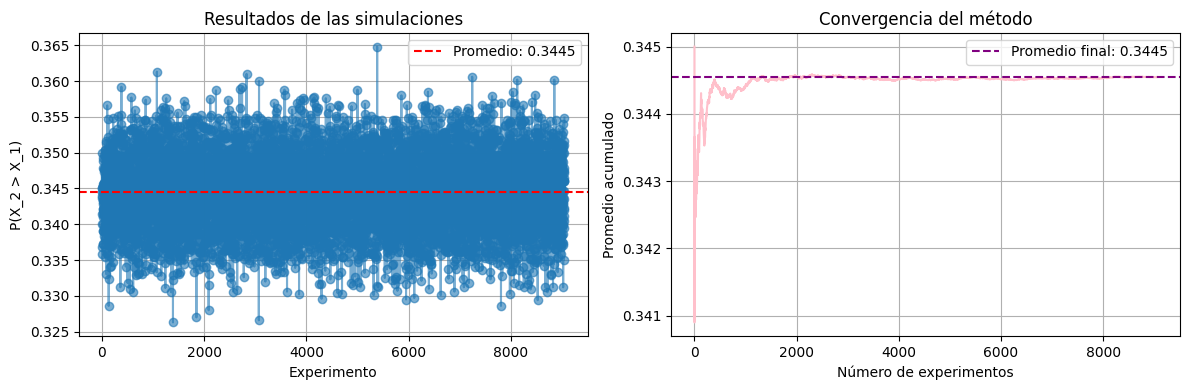

Probabilidad analítica P(X_2 > X_1): 0.3446


In [46]:
# Calcular el promedio de las probabilidades estimadas
average_probability = np.mean(results)
print(f"Probabilidad estimada P(X_2 >= X_1): {average_probability:.4f}")

# Graficar la convergencia del método
plt.figure(figsize=(12, 4))
# Gráfico 1: Convergencia de los resultados
plt.subplot(1, 2, 1)
plt.plot(range(1, M+1), results, 'o-', alpha=0.6)
plt.axhline(y=average_probability, color='r', linestyle='--', label=f'Promedio: {average_probability:.4f}')
plt.xlabel('Experimento')
plt.ylabel('P(X_2 > X_1)')
plt.title('Resultados de las simulaciones')
plt.grid(True)
plt.legend()

# Gráfico 2: Valor acumulado (convergencia)
plt.subplot(1, 2, 2)
cumulative_average = np.cumsum(results) / np.arange(1, M+1)
plt.plot(range(1, M+1), cumulative_average, 'pink')
plt.axhline(y=average_probability, color='purple', linestyle='--', label=f'Promedio final: {average_probability:.4f}')
plt.xlabel('Número de experimentos')
plt.ylabel('Promedio acumulado')
plt.title('Convergencia del método')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Cálculo analítico de la probabilidad P(X_2 > X_1)
# Para dos variables aleatorias normales, la diferencia también es normal
# X_2 - X_1 ~ N(mu_2 - mu_1, sqrt(sigma_2^2 + sigma_1^2))
mu_diff = mu_2 - mu_1
sigma_diff = np.sqrt(sigma_2**2 + sigma_1**2)

# P(X_2 - X_1 > 0) = P(Z > -mu_diff/sigma_diff)
prob_analitica = 1 - norm.cdf(0, mu_diff, sigma_diff)
print(f"Probabilidad analítica P(X_2 > X_1): {prob_analitica:.4f}")


(array([ 1.,  0.,  1.,  1.,  2.,  0.,  1.,  0.,  0.,  0.,  1.,  2.,  2.,
         2.,  1.,  1.,  0.,  1.,  4.,  3.,  3.,  5.,  5.,  5.,  3.,  3.,
         7.,  9.,  5.,  4., 13.,  4.,  7.,  7.,  9., 13.,  7.,  7.,  5.,
         7.,  8.,  3.,  9.,  5., 11.,  3., 10.,  6.,  3.,  3.,  1., 10.,
         1.,  5.,  5.,  3.,  1.,  4.,  1.,  2.,  0.,  1.,  1.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.3319    , 0.33225867, 0.33261733, 0.332976  , 0.33333467,
        0.33369333, 0.334052  , 0.33441067, 0.33476933, 0.335128  ,
        0.33548667, 0.33584533, 0.336204  , 0.33656267, 0.33692133,
        0.33728   , 0.33763867, 0.33799733, 0.338356  , 0.33871467,
        0.33907333, 0.339432  , 0.33979067, 0.34014933, 0.340508  ,
        0.34086667, 0.34122533, 0.341584  , 0.34194267, 0.34230133,
        0.34266   , 0.34301867, 0.34337733, 0.343736  , 0.34409467,
        0.34445333, 0.344812  , 0.34517067, 0.34552933, 0.345888  ,
        0.34624667, 0.34660533,

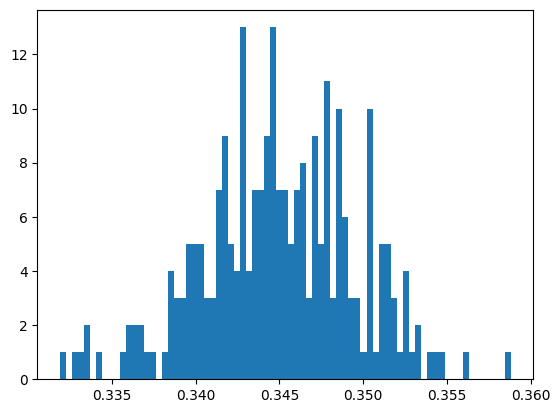

In [ ]:
#histograma
plt.hist(results, bins=75)